In [1]:
import numpy as np

raw_data = np.genfromtxt('./x09.txt', skip_header=36)
raw_data  # 0번 컬럼은 인덱스, 1번 컬럼은 구분선, 2~4번 컬럼이 value


array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

##### 데이터 파악

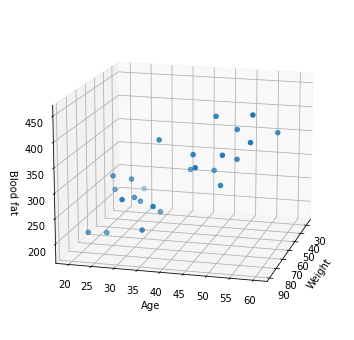

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
%matplotlib inline

xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

- 이 예제의 목적은 입력인 나이와 몸무게를 알려주면, 주어진 데이터 기준의 blood fat을 얻는 것 
- Linear Regression

> 현재 목표 : y = xw + b에서 x1, x2를 입력해서 y가 나오게 하는 w와 b를 구하는 것 

##### 학습 대상 데이터 준비 

In [3]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)   # 모든 행의 2, 3번 컬럼 => h, w
y_data = np.array(raw_data[:, 4], dtype=np.float32)     # 모든 행의 4번 컬럼 => blood fat

In [4]:
y_data.shape

(25,)

In [5]:
x_data.shape

(25, 2)

-  y의 shape을 조정해줘야 한다. 
</br>y = xw + b
</br>x : 25 x 2
</br>w : 2 x 1
</br>b : 25 x 1
- 따라서 y의 shape을 (25,) => (25, 1) 로 변경해줘야 한다.

In [6]:
y_data = y_data.reshape((25, 1))
y_data.shape

(25, 1)

##### 원래 의도한 모델 만들기

In [7]:
!pip install keras

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, ))     #출력 1개, 입력 2개 
])

model.compile(optimizer='rmsprop', loss='mse')

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-05 20:19:18.635594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-05 20:19:18.635698: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### loss
- 학습을 위해서는 loss(cost)함수를 정해주어야 한다.
- loss 함수는 정답까지 얼마나 멀리 있는지(error)를 측정하는 함수이다.
- 이번에는 mse:mean square error 오차 제곱의 평균을 사용
- 그리고 옵티마이저를 선정한다. 옵티마이저는 loss를 어떻게 줄일 것인지를 결정하는 방법을 선택하는 것

#### optimizer
- loss 함수를 최소화하는 가중치를 찾아가는 과정에 대한 알고리즘이다. 
- 여기서는 rmsprop 사용 

In [9]:
model.compile(optimizer='rmsprop', loss='mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


- parameter 3개: weight 2개, bias 1개 

##### 학습

In [11]:
# epochs=3000 이상 실행하면 메모리 과부하 
hist = model.fit(x_data, y_data, epochs=4000)

Epoch 1/4000


2022-07-05 20:19:23.880175: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-05 20:19:24.015173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 199ms/step - loss: 64397.0195
Epoch 2/4000
1/1 [==============================] - 0s 6ms/step - loss: 64223.3086
Epoch 3/4000
1/1 [==============================] - 0s 6ms/step - loss: 64097.5195
Epoch 4/4000
1/1 [==============================] - 0s 8ms/step - loss: 63992.3398
Epoch 5/4000
1/1 [==============================] - 0s 6ms/step - loss: 63899.0742
Epoch 6/4000
1/1 [==============================] - 0s 5ms/step - loss: 63813.6953
Epoch 7/4000
1/1 [==============================] - 0s 10ms/step - loss: 63733.9375
Epoch 8/4000
1/1 [==============================] - 0s 8ms/step - loss: 63658.4141
Epoch 9/4000
1/1 [==============================] - 0s 6ms/step - loss: 63586.1875
Epoch 10/4000
1/1 [==============================] - 0s 6ms/step - loss: 63516.5938
Epoch 11/4000
1/1 [==============================] - 0s 6ms/step - loss: 63449.1484
Epoch 12/4000
1/1 [==============================] - 0s 5ms/step - loss: 63383.4883
Epoch 13/40

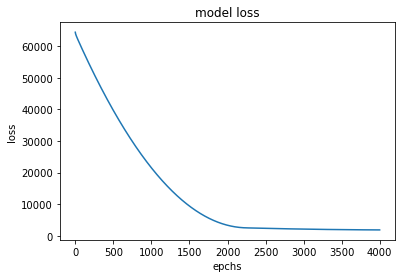

In [12]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epchs')
plt.show()

##### 학습 모델을 활용해서 예측하기
- 몸무게 100, 나이 44인 사람의 blood fat 예측

In [13]:
model.predict(np.array([100, 44]).reshape(1,2)) # 왜 shape을 (1,2)로 지정?

1/1 [==============================] - 0s 185ms/step


2022-07-05 20:22:14.846760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[379.23505]], dtype=float32)

In [14]:
model.predict(np.array([60, 25]).reshape(1,2))

1/1 [==============================] - 0s 10ms/step


array([[221.77731]], dtype=float32)

##### 가중치와 bias

In [15]:
w_, b_ = model.get_weights()
print('Weight is : ', w_)
print('bias is : ', b_)

Weight is :  [[1.4426651]
 [5.2500606]]
bias is :  [3.9658933]


##### 모델 성능 확인 

In [16]:
x = np.linspace(20, 100, 50).reshape(50, 1)     # 20kg에서 100kg까지 50개의 데이터 생성
y = np.linspace(10, 70, 50).reshape(50, 1)      # 10살부터 70살까지 50개의 데이터 생성 

X = np.concatenate((x, y), axis=1)              # x, y의 특성 데이터 concatenate
Z = np.matmul(X, w_) + b_

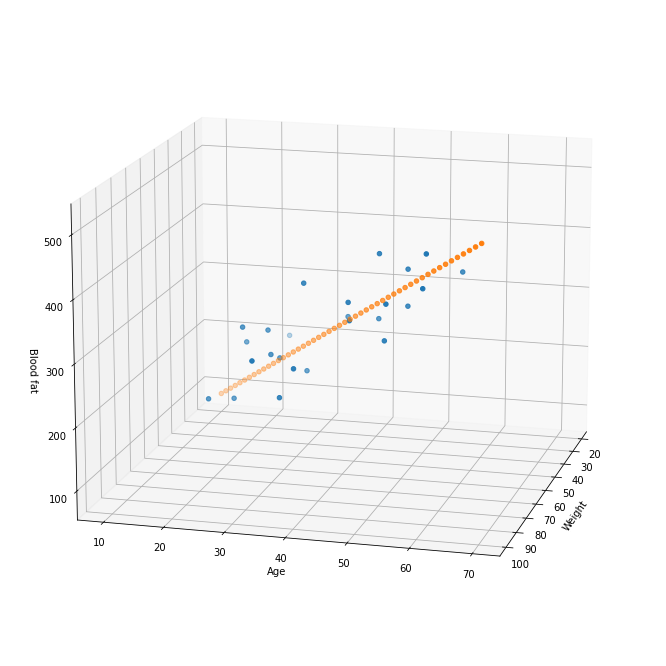

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)     # 원래 데이터
ax.scatter(x, y, Z)         # 가중치와 bias를 적용한 예측 데이터 
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

## XOR 문제 

- 선형 모델로는 XOR 문제를 풀 수 없다.

In [18]:
import numpy as np 

##### 데이터 준비

In [19]:
X = np.array([ [0, 0], [1, 0], [0, 1], [1, 1] ])
y = np.array([[0], [1], [1], [0]])

In [20]:
# activation 기능을 넣으면 선형함수 2개를 합칠 때 선형이 아닌 비선형함수를 만들어준다.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),       # 입력 2개 출력 2개 
    tf.keras.layers.Dense(1, activation='sigmoid')                          # 위에서 입력받은 값을 사용하기 때문에 입력을 지정해줄 필요 x, 최종 출력은 1개 
])

- 

In [21]:
# 옵티마이저 선정, 학습률 선정, loss 함수는 mse
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

/Users/seyilee/mambaforge/envs/ds_study/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


- epochs: 지정된 횟수만큼 학습을 하는 것 
- batch_size: 한번에 학습에 사용될 데이터의 수를 지정 

In [23]:
hist = model.fit(X, y, epochs=4000, batch_size=1)

Epoch 1/4000


2022-07-05 20:31:54.714854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 3ms/step - loss: 0.2577
Epoch 2/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 3/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2572
Epoch 4/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2570
Epoch 5/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2568
Epoch 6/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2566
Epoch 7/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2564
Epoch 8/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2563
Epoch 9/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2562
Epoch 10/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2561
Epoch 11/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.2560
Epoch 12/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2559
Epoch 13/4000
4/4 [==============================] - 0s 4ms/st

In [24]:
model.predict(X)

1/1 [==============================] - 0s 168ms/step


2022-07-05 20:34:39.043317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.07131273],
       [0.93923604],
       [0.9139334 ],
       [0.06232353]], dtype=float32)

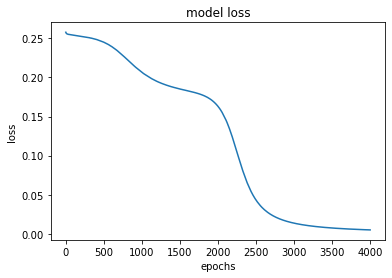

In [26]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [28]:
# 학습에서 찾은 가중치 
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.5932145,  5.8311086],
       [-4.3305583, -5.7939057]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.0751188, -3.3848705], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-6.490766],
       [ 6.783556]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([2.9777887], dtype=float32)>


## 분류

#### iris 데이터

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

#### One Hot Encoding
- 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [31]:
enc.categories_

[array([0, 1, 2])]

In [32]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

#### 데이터 나누기 

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

> Back propagation(역전파)
> - 딥러닝 신경망에서 loss를 역방향으로 전달하는 것 

> Gradient Vanishing
> - activation을 sigmoid로 지정할 경우, back propagation 이 진행되면서 레이어가 깊어질수록 loss값이 점점 작아진다. => underfitting 

> Relu
> - 0과 1사이의 값으로 한정되지 않고 값이 점차 증가해나간다. 

##### actovation 사용 구분 
- value가 얼마일지 예측할 때: output을 그냥 받는다.
- OX 문제: output에 sigmoid 사용 
- 분류 문제: output에 softmax 사용

- softmax: output의 합을 1로 처리, output중 가장 높은 값을 정답으로 인식 

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

#### Optimizer
- loss가 최저인 지점을 찾는 방식
- gradient decent: loss function의 현 가중치에서 기울기(gradient)를 구해서 loss를 줄이는 방향으로 업데이트
- SGD: gradient decent는 한번 스텝을 진행할 때 모든 데이터를 사용하기 때문에 너무 무거워질 수 있다. 이를 보완하는 방식이 SGD인데, 데이트를 잘게 쪼개서 데이터 조각 당 1스텝을 간다. 
- 잘모르겠으면 adam을 사용하자 

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2022-07-05 20:45:58.381750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 41ms/step - loss: 1.2804 - accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1248 - accuracy: 0.3500
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0367 - accuracy: 0.4333
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9732 - accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9022 - accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8484 - accuracy: 0.6500
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8009 - accuracy: 0.6500
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7545 - accuracy: 0.6583
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7089 - accuracy: 0.7000
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.8417
Epoch 11/100
4/4 [====================

In [38]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0770 - accuracy: 1.0000 - 99ms/epoch - 99ms/step


2022-07-05 20:46:14.128118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.07704326510429382, 1.0]

#### loss와 acc의 변화

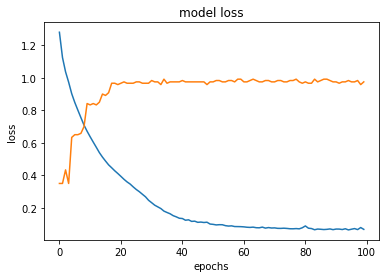

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

- loss는 점점 낮아지고 accuracy는 점점 높아지고 있다. 

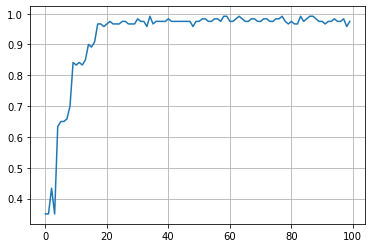

In [40]:
plt.plot(hist.history['accuracy'])
plt.grid()